


## "Do you speak NLP?"

#### Ein Streifzug durch modernes Natural Language Processing mit Python

## Natural Language Processing - was ist das genau?

* Dokumentenmanagementsoftware in Bibliotheken, Archiven und Behörden

* Analyse von Schadensreports bei Versicherungen

* Maschinelle Übersetzung von Rechtstexten in 23 EU-Sprachen

* Automatisches Verteilen von Supportmails

* Monitoring von Social Media Platformen für bekannte Unternehmen, Personen etc.

## NLP - Ein Definitionsversuch

_"Das (automatische) Verarbeiten von Input in natürlicher Sprache durch Computer(-programme)"_

#### Bereiche

* Rule-based NLP
* Statistical NLP
* ML / Neural NLP

# Sentiment Analysis!

_Automatisiertes und flächendeckendes Einfangen von Stimmungen_

Sentiment Analysis ist im Grunde Document Classification mit den Labels positiv und negativ.

* Wir wollen Sentiments von (englischsprachigen) Produkt-Reviews auf Amazon ermitteln

* Baseline: Menschliche Trefferquote von etwa 80%

## Part 1 : Rule based NLP 

### Allgemeines

* Grundlage: linguistisches und philologisches Fachwissen

* "Wenn wir die Regeln kennen, brauchen wir keine ML-Models dafür zu trainieren" 

* Besonders stark im Pre-Processing: Tokenization, Stemming, Lemmatization etc.

* Hauptakteuere (Python): NLTK, Spacy (Rules)

### Datengrundlage

Datensets von Product Reviews von Amazon.com.

Datensets zu finden auf kaggle.com:

* https://www.kaggle.com/arhamrumi/amazon-product-reviews

Liste positiver und negativer Begriffe der Universität Chicago:

* http://www.cs.uic.edu/~liub/FBS/opinion-lexicon-English.rar

Code für Webinar zu finden unter:

* https://github.com/restlessbytes/nlp-webinar

In [1]:
import nltk
from utils import tokens, stopwords_english
from data_loaders import load_pos_neg_words, load_pos_neg_lookup

In [2]:
rev_pos = "Fine tissue, awesome colour!"
rev_neg = "That phone charger is completely useless - don't buy!!!"

In [7]:
# preprocessing: splitting / tokenizing
tks = tokens(rev_neg)
tks

['phone', 'charger', 'completely', 'useless', 'not', 'buy']

In [14]:
# sentiment lookups & counts
sentiment_lookup = load_pos_neg_lookup()
sentiment_lookup.get('phone')
from collections import Counter

Counter([sentiment_lookup.get(t.lower(), '') for t in tks])

Counter({'': 5, 'negative': 1})

## Unsere Regel in der Übersicht

**Regel 1** : Ein Wort == Ein Token  
**Regel 2** : Stop und Grammar words werden ignoriert  
**Regel 3** : Ein Text ist positiv, wenn die Anzahl positiver Begriffe die der negativen überwiegt (analog für negativ).


# Let's test!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def show_results(results, results_by_sent):
    correct, sample_size = results
    results_percentage = 100 * (correct / sample_size)
    
    # define subplots
    fig, axs = plt.subplots(ncols=len(results_by_sent)+1, figsize=(12, 4))
    fig.tight_layout(pad=2)
    
    # overall performance
    cur_ax = axs[0]
    
    colors = ['tab:blue', 'tab:cyan']
    bars = ['labeled', 'correct']
    title = f"Overall ({results_percentage:.2f}%)"
    cur_ax.set_title(title)
    
    x_pos = np.arange(len(bars))

    cur_ax.bar(x_pos, [results[1], results[0]], color=colors)
    cur_ax.set_xticks(x_pos)
    cur_ax.set_xticklabels(bars)

    # barplot subplots
    colors = ['tab:blue', 'tab:cyan', 'tab:blue']
    # bars = ['labeled', 'predicted', 'correct']
    bars = ['predicted', 'labeled', 'correct']
    for pos, res in enumerate(results_by_sent):
        label, data = res
        lbl, prd, cor = data

        cur_ax = axs[pos+1]
        cur_cor = (cor / lbl) * 100
        title = f"{label} ({cur_cor:.2f}%)"
        cur_ax.set_title(title)

        x_pos = np.arange(len(bars))

        cur_ax.bar(x_pos, [prd, lbl, cor], color=colors)
        cur_ax.set_xticks(x_pos)
        cur_ax.set_xticklabels(bars)

    plt.show()

### [Rule based] Sentiment : Amazon reviews

| Amazon Reviews : Test Setup | |
| :--- | ---: |
| Training Sample Size | 0 |
| Test Sample Size | 3000 |
| Feature vector size | 6786 |
| **Information about Amazon Reviews** | |
| Avg. text length (in tokens) |      42 |
| Min text length (in tokens) |       6 |
| Max text length (in tokens) |     1077 |
| Avg. share of 3000 most common words | 60.38% |

In [5]:
# overall correctly predicted results
correct = (1963, 3000)
# record format: (<sentiment>, [<label>, <predicted>, <correct>])
amazon_results = [('positive', [1542, 2086, 1403]), ('negative', [1458, 618, 560])]

### [Rule based] Sentiment : Amazon reviews

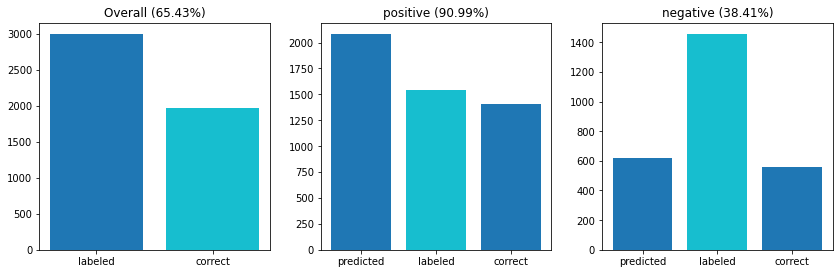

In [6]:
show_results(correct, amazon_results)

### Rule-based NLP - Was wir hier mitnehmen können

* Basiert auf linguistischen Erkenntnissen

* Datengrundlage ist relativ einheitlich oder nischenspezifisch

* Datengrundlage zu klein für ML-Ansätze

* Programme relativ einfach und verständlich

* Performance kein maßgebliches Kriterium

## Interludium : Rule-based Matchers (spacy)

In [ ]:
# spacy Rule based Matchers
...
pattern_pos = [{"LEMMA": {"IN": pos}}]
pattern_neg = [{"LEMMA": {"IN": neg}}]

matcher.add("pos", [pattern_pos])
matcher.add("neg", [pattern_neg])

matcher(doc)

## Part 2 : Statistical NLP

Oder: Was tun, wenn wir statt einer Horde Linguisten eine Horde Statistiker haben?

* Statistical NLP = Rule-based + Statistische Modelle

* ab hier beginnt der Bereich des Machine Learning

* Hauptakteuere: Decision Trees, Support Vector Machines und Naive Bayes

* Idee: Das Nutzen von Modellen um automat. Regeln abzuleiten

### Statistical NLP und Sentiment Analysis

In [ ]:
import nltk

from nltk import NaiveBayesClassifier

rev_pos_token = {'awesome', 'tablet', 'speed'}

rev_pos_bag = {'tablet': True, 'not': False, 'tablet': False, 'awesome': True, 'speed': True, 'horrible': False}

In [ ]:
rev_pos = "Awesome tablet, awesome speed!"
rev_neg = "That tablet was horrible, won't buy it again"

# bag of words
rev_pos

In [ ]:
rev_pos_token

In [ ]:
rev_pos_bag

## Der Naive Bayes


![Naive Bayes Classifier](images/naive_bayes.png)

**"Awesome tablet, awesome speed!"**

| |positive|negative|
| :--- | :--- | :--- |
|awesome|0.5|0.1|
|tablet|0.3|0.3|
|speed|0.2|0.4|
|=|**0,03**|0,012|

# Let's test!

### [Naive Bayes] Sentiment for Amazon reviews 

| Amazon Reviews : Test Setup | |
| :--- | ---: |
| Training Sample Size | 40000 |
| Test Sample Size | 6000 |
| Feature vector size | 3000 |
| **Information about Amazon Reviews** | |
| Avg. text length (in tokens) |      42 |
| Min text length (in tokens) |       5 |
| Max text length (in tokens) |      799 |
| Avg. share of 3000 most common words | 60.18% |

In [11]:
# overall correctly predicted results
correct = (5094, 6000)
# record format: (<sentiment>, [<label>, <predicted>, <correct>])
amazon_results = [('positive', [3000, 3268, 2681]), ('negative', [3000, 2732, 2413])]

### [Naive Bayes] Sentiment for Amazon reviews

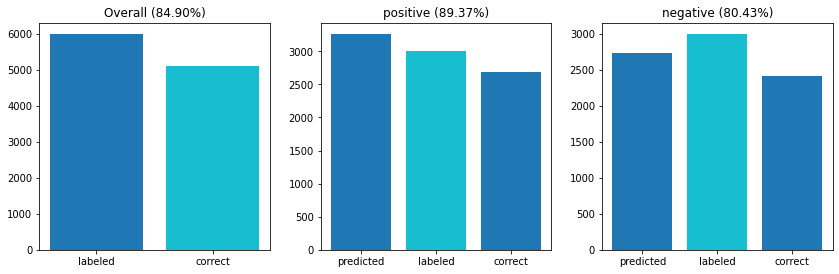

In [10]:
show_results(correct, amazon_results)

## Beispiele


"Works fine on wifi, otherwise a little slow. My kid enjoys it though. For the price it's good."

 **3 Sterne**

"I personally like the old shape ( more square ) of the kindle better. I use to have a 8 inch and loved it until my grandkids dropped it and now it doesn't work any more." 

**5 Sterne**

## Beispiele



great **not** amazon price kindle would best much battery read reading **little** far using life still <br/>able go **without** name want yet though overall think **bad** longer hours cover

**Erkannt:  negative - Orginal:  positive**

**great** tablet not **good** would **recommend** older

**Erkannt:  positive - Orginal:  negative**

### Statistical NLP - Was wir hier mitnehmen können

* relativ einfach zu verstehen

* wenig linguistisches Fachwissen nötig

* braucht vergleichsweise wenig Trainingsdaten für gute Ergebnisse

* Gute Performance ist wichtig

* Kontinuierliches Training

* Robust (wenig Probleme mit fehlenden und/oder unvollständigen Daten)

* Reviews in denen die Begriffe **"Not"** und **"Bad"** vorkommen sind wahrscheinlich negativ 

## Part 3 : Neural NLP

### Word Vectors!

**Idee**: Repräsentiere ein Wort bzw. dessen Bedeutung als einen Vector $v \in R^N$:  
&emsp;&emsp;super = $(2.1, 3.8)$, toll = $(2.9, 4.1)$, schlecht = $(3.8, 2.1)$, grauenhaft = $(4.1, 1.7)$

![Word Vector Space](images/word_vec_space.png)

$\rightarrow$ Ähnlichkeit von Wörtern = Nähe im Vektorraum!

### Word Embeddings durch Neuronale Netze

![Word Embedding](images/nn_word_embedding.png)

### Word Vectors $\rightarrow$ Document Vectors

**Idee**: Repräsentiere ein Dokument bzw. dessen Bedeutung als einen Vektor $v \in R^N$.

![Doc Embedding](images/doc_vec_space.png)

$\rightarrow$ Ähnlichkeit von Dokumenten = Nähe in Vektorraum!

### Doc2Vec - Von Word embeddings zu Document embeddings

![Document Embedding](images/nn_doc_embedding.png)

# Let's test!

### [NN Doc2Vec] Sentiment for Amazon reviews

| Amazon Reviews : Test Setup | |
| :--- | ---: |
| Training Sample Size | 40000 |
| Test Sample Size | 6000 |
| Feature vector size | 300 |
| Training epochs | 20 |
| **Information about Amazon Reviews** | |
| Avg. text length (in tokens) |      42 |
| Min text length (in tokens) |       5 |
| Max text length (in tokens) |      611 |
| Avg. share of 3000 most common words | 60.32% |

In [13]:
# overall correctly predicted results
correct = (4922, 6000)
# record format: (<sentiment>, [<label>, <predicted>, <correct>])
amazon_results = [('positive', [3000, 2782, 2352]), ('negative', [3000, 3218, 2570])]

### [NN Doc2Vec] Sentiment for Amazon reviews

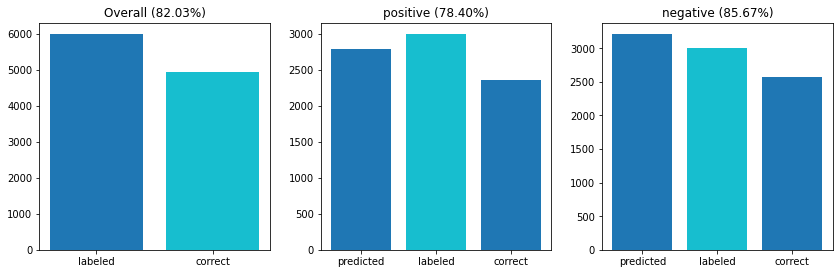

In [14]:
show_results(correct, amazon_results)

### Neural NLP - Was wir hier mitnehmen können

* Großer Trainingscorpus notwendig + Resourcenverbrauch

* Hohe Genauigkeit und Flexibilität

* Kontinuierliches Training

* Verständlichkeit und Nachvollziehbarkeit unwichtig

* Große Corpora meist nur in weit verbreiteten Sprachen vorhanden

# Conclusions and Outlooks

* Methoden und Modelle aller 3 Gebiete werden aktiv eingesetzt

* Tendenz geht momentan sehr stark in Richtung Neuronales NLP (seit etwa 2015)

### Die grundlegenden Probleme des NLP sind nach wie vor ungelöst!

1. Es heißt nach wie vor "Natural Language _Processing_" und nicht "Natural Language _Unterstanding_".

2. Es ist keinem der Ansätze gelungen, universelle (d.h. sprachenübergreifende) Models zu produzieren.